In [1]:
import pandas as pd
import sys
sys.path.append('../')
from embedding_functions_hugo.embedding_functions import *

In [2]:
df1 = pd.read_csv('../data/EscapefromTarkov_10bwu1h.csv')
df2 = pd.read_csv('../data/SatisfactoryGame_10dvy6x.csv')
df2

,author,comment
0,DislocatedLocation,"The moment the screen went black, I tensed up ..."
1,defaultgameer1,I am so damn happy about this haha. I saw the ...
2,Sheersanctity,Hahahaha i fn called it; idc how old this joke...
3,Stevejazzy,All roads lead to Skyrim
4,Metalutionary,Okay you got me lmao. I was expecting stickbug...
5,Gunk_Olgidar,"Yes, this. \n\nI was expecting this the first..."
6,Anvisaber,"I love this meme so much, I’ll never get tired..."
7,NinjaBr0din,"Hey, look, someone found my first attempt at a..."
8,Zenvarix,"At this point, I'm hoping a different game doe..."
9,Special_Grocery3729,"Todd Howard, you did it again."


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


([[-4.422243,
   -5.169947,
   -1.9675828,
   -5.0283637,
   -5.9002714,
   -6.9061136,
   -5.370858,
   -5.555107,
   -3.7075427,
   6.33004,
   -4.5930247,
   -2.1873367,
   11.162876,
   -4.5741086,
   12.222653,
   3.1542037,
   0.3512682,
   -4.5226874,
   3.8661308,
   2.9995005,
   -6.5508494,
   -1.47845,
   -6.034246,
   -5.49355,
   -3.9947488,
   0.02478513,
   -6.8165417,
   -2.817641,
   2.5625036,
   4.0488315,
   6.857374,
   -5.8928113,
   -5.7682805,
   -7.8377676,
   3.4990854,
   0.5161702,
   -3.474924,
   -5.603945,
   -3.444667,
   -4.884169,
   -1.6723713,
   -7.0089254,
   -6.169604,
   -3.3208444,
   -3.859007,
   -3.3052435,
   -7.185825,
   -5.69554,
   -5.627968,
   -6.278638,
   -1.3345497,
   1.0081402,
   4.2946324,
   -1.0670485,
   3.1237655,
   -4.590254,
   -5.887156,
   11.705363,
   -4.9684215,
   -6.742555,
   2.6202457,
   -3.6193433,
   -0.92600787,
   5.168622,
   0.35784465,
   7.269227,
   13.828591,
   7.733217,
   6.2268515,
   7.586775,
   

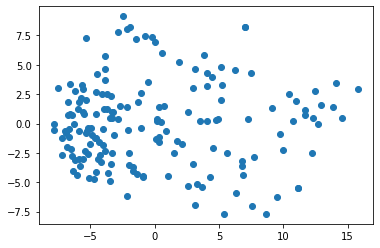

In [3]:
embed_comments(df1['comment'])
two_dims(df1['comment'])

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


({'The moment the screen went black, I tensed up waiting for that oh-so-familliar cart ride through a snowy land.': array([-4.823186], dtype=float32),
  'I am so damn happy about this haha. I saw the original post on this and knew it was a missed opportunity.': array([-0.82183194], dtype=float32),
  'Hahahaha i fn called it; idc how old this joke gets it always will please me.': array([3.7596917], dtype=float32),
  'All roads lead to Skyrim': array([5.203943], dtype=float32),
  'Okay you got me lmao. I was expecting stickbug or rick rolling lol': array([-2.2527037], dtype=float32),
  'Yes, this.  \n\nI was expecting this the first time.\n\n![gif](giphy|hVazFLob1BnLpuWoXx|downsized)': array([2.567592], dtype=float32),
  'I love this meme so much, I’ll never get tired of it': array([6.432537], dtype=float32),
  'Hey, look, someone found my first attempt at a hyper cannon.\n\nWeird, when I did it Becky punched a hole in spacetime and took out the dinosaurs, you did it and brought back dra

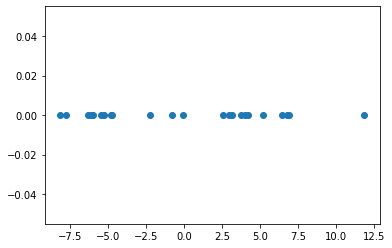

In [4]:
one_dim(df2['comment'])

In [10]:
def clustering_comments(comments, cluster_count): 
    '''Takes a collection of comments, maps it to a 2d/1d space and clusters them in a user-determined amount of groups.'''
    # imports 
    from sklearn.cluster import KMeans
    import numpy as np
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    from numpy import unique
    from numpy import where
    #load_data
    sentences = embed_comments(comments)

    # Initialize model
    model = KMeans(n_clusters=2)

    # Fit model
    model.fit(sentences)

    #Make predictions
    yhat = model.predict(sentences)

    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        plt.scatter(sentences[row_ix, 0], sentences[row_ix, 1])
        # show the plot
    plt.show()

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


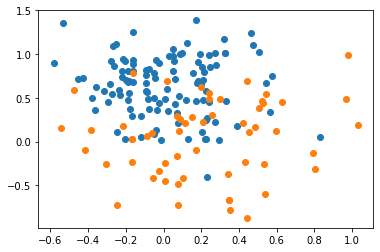

In [13]:
clustering_comments(df1['comment'], 2)